In [23]:
import os
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16


# Klasyfikacja śmieci

In [16]:
data_path = './input/garbage classification/Garbage classification'
categories = os.listdir(data_path)

In [17]:
print(categories)

['glass', 'cardboard', 'trash', 'metal', 'paper', 'plastic']


In [18]:
img_height, img_width = 124, 124
batch_size = 32

In [20]:
train_batches = ImageDataGenerator(
   rescale= 1./255,
    zoom_range= (0.73, 0.9),
    horizontal_flip= True,
    rotation_range= 10,
    width_shift_range= 0.10,
    fill_mode= 'constant',
    height_shift_range= 0.10,   
    brightness_range= (0.55, 0.9),
    validation_split=0.1).flow_from_directory(
        directory=data_path, 
        target_size=(img_width,img_height), 
        classes=categories, 
        batch_size=batch_size,shuffle= True,seed= 1111, subset='training')

valid_batches = ImageDataGenerator(
    rescale= 1./255, 
    validation_split=0.1).flow_from_directory(
    directory=data_path, 
    target_size=(img_width,img_height), 
    classes=categories, batch_size=batch_size,shuffle= True,seed= 1111, subset='validation')

test_batches = ImageDataGenerator(
    rescale= 1./255, 
    validation_split=0.1).flow_from_directory(
    directory=data_path, 
    target_size=(img_width,img_height),
    classes=categories,
    batch_size=251,shuffle= False,subset='validation')

Found 2277 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


the numbers of images in glass class :  501
(384, 512, 3)


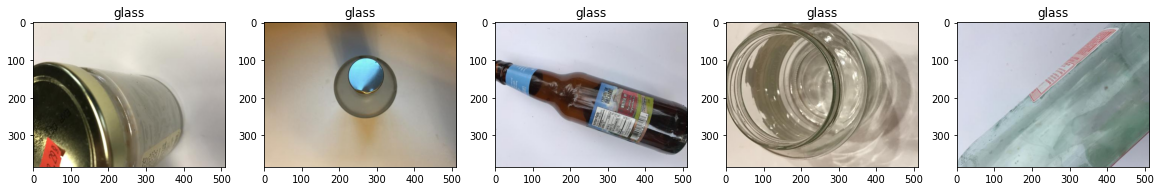

the numbers of images in cardboard class :  403
(384, 512, 3)


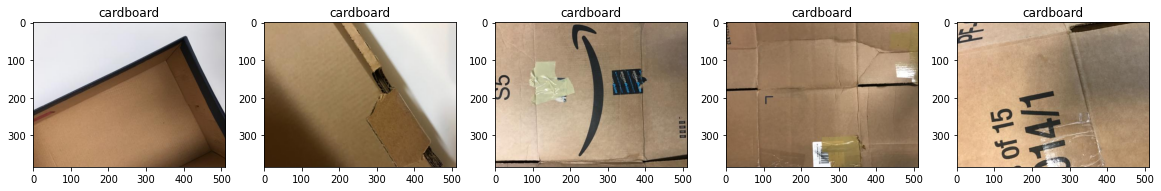

the numbers of images in trash class :  138
(384, 512, 3)


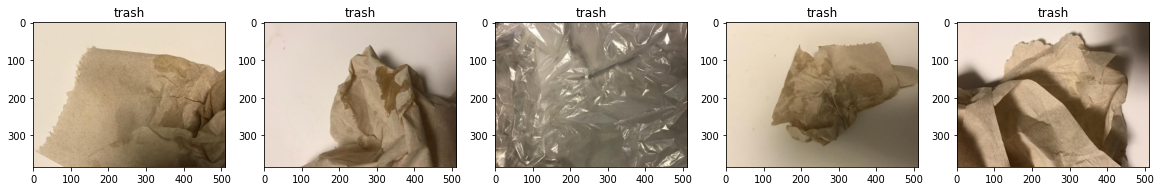

the numbers of images in metal class :  410
(384, 512, 3)


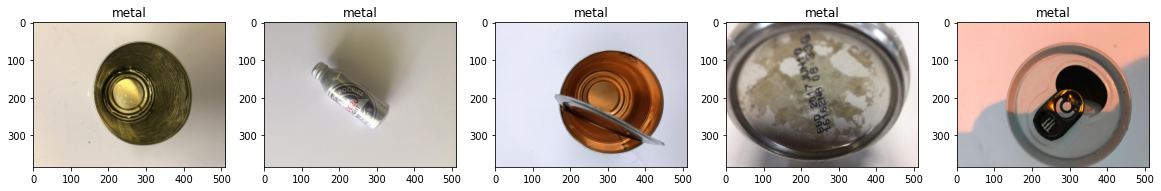

the numbers of images in paper class :  594
(384, 512, 3)


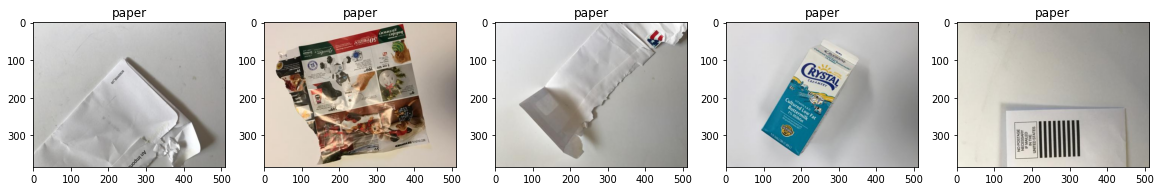

the numbers of images in plastic class :  482
(384, 512, 3)


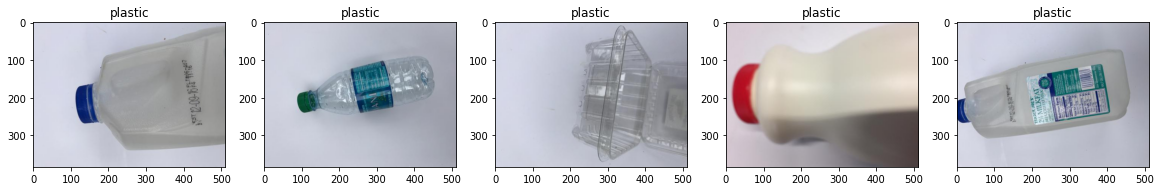

In [22]:
for i in range(len(categories)):
    imageInfile=[]
    imageInfile=os.listdir(os.path.join(data_path,categories[i]))
    print( f"the numbers of images in {categories[i]} class : " , len(imageInfile))
    plt.figure(figsize=(20,20))
    for j in range(5):
        plt.subplot(1,5,j+1)
        image=plt.imread(os.path.join(os.path.join(data_path,categories[i]),imageInfile[j]))
        plt.title(categories[i])
        plt.imshow(image,cmap='gray')
    print(image.shape)
    plt.show()

In [24]:
base_model = VGG16(weights='imagenet',input_shape=(150,150,3), include_top=False)

2022-05-31 20:12:27.433259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 20:12:27.433779: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-31 20:12:27.433920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-31 20:12:27.434029: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-31 20:12:27.434109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

58900480/58889256 [==============================] - 5s 0us/step


In [25]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [26]:
model = Sequential()

base_model.trainable=False

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                
model.add(Dropout(0.2))                  

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               6

In [28]:
model.compile(optimizer=keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model_det = model.fit(train_batches, 
    epochs = 13,
    validation_data = valid_batches, 
    verbose = 2,
    shuffle = True)

Epoch 1/13


KeyboardInterrupt: 